<a href="https://colab.research.google.com/github/Telange/repository-/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. KMeans Clustering - Unsupervised Machine Learning

In [1]:
%pip install yellowbrick

In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

Step 1 - Data Ingestion

In [3]:
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/Mall_Customers.csv"
print(url)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/Mall_Customers.csv


In [4]:
import pandas as pd
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Step 2 - Perform Basic data quality checks


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Spending    200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Income,0
Spending,0


In [7]:
df.duplicated().sum()

0

Goal - To categorize similar customers by Income and Spending

Step 3 - Sepeate X values

In [8]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Income', 'Spending'], dtype='object')

In [9]:
X = df[["Income", "Spending"]]

In [10]:
X.head()

,Income,Spending
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### Step 4 - Apply Preprocessing on X

In [11]:
X.dtypes

,0
Income,int64
Spending,int64


In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler().set_output(transform="pandas")

In [14]:
X_pre = scaler.fit_transform(X)

In [15]:
X_pre[0:5]

,Income,Spending
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


## Step 5- Selecting optimum number of clusters

In [16]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

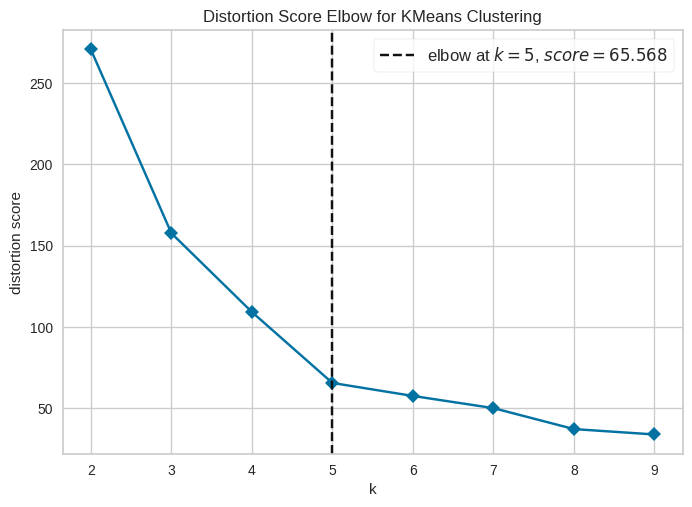

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
km = KMeans()

vis = KElbowVisualizer(km, k=(2, 10), timings=False)

vis.fit(X_pre)

vis.show()

## Optimum number of clusters to select are 5 from above graph

## Build Kmeans with nclusters = 5

In [18]:
best_kmeans = KMeans(n_clusters=5)

best_kmeans.fit(X_pre)

KMeans(n_clusters=5)

In [19]:
km_labels = best_kmeans.labels_
km_labels

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0,
       4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2,
       0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

## Visualizing the result

In [20]:
X1 = X_pre.copy()
X1

,Income,Spending
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


In [21]:
X1 = scaler.inverse_transform(X1)
X1[0:5]

array([[15., 39.],
       [15., 81.],
       [16.,  6.],
       [16., 77.],
       [17., 40.]])

In [22]:
X1 = pd.DataFrame(X1, columns=X_pre.columns)
X1.head()

,Income,Spending
0,15.0,39.0
1,15.0,81.0
2,16.0,6.0
3,16.0,77.0
4,17.0,40.0


In [23]:
X1["Cluster"] = km_labels

In [24]:
X1

,Income,Spending,Cluster
0,15.0,39.0,4
1,15.0,81.0,1
2,16.0,6.0,4
3,16.0,77.0,1
4,17.0,40.0,4
...,...,...,...
195,120.0,79.0,2
196,126.0,28.0,3
197,126.0,74.0,2
198,137.0,18.0,3


In [25]:
X1.query(f"Cluster == 0")

,Income,Spending,Cluster
43,39.0,61.0,0
46,40.0,55.0,0
47,40.0,47.0,0
48,40.0,42.0,0
49,40.0,42.0,0
...,...,...,...
121,67.0,40.0,0
122,69.0,58.0,0
126,71.0,35.0,0
132,72.0,34.0,0


In [26]:
for i in range(5):
  print(f"Cluster number : {i}")
  display(X1.query(f"Cluster == {i}"))
  print("\n==================================\n")

Cluster number : 0


,Income,Spending,Cluster
43,39.0,61.0,0
46,40.0,55.0,0
47,40.0,47.0,0
48,40.0,42.0,0
49,40.0,42.0,0
...,...,...,...
121,67.0,40.0,0
122,69.0,58.0,0
126,71.0,35.0,0
132,72.0,34.0,0




Cluster number : 1


,Income,Spending,Cluster
1,15.0,81.0,1
3,16.0,77.0,1
5,17.0,76.0,1
7,18.0,94.0,1
9,19.0,72.0,1
11,19.0,99.0,1
13,20.0,77.0,1
15,20.0,79.0,1
17,21.0,66.0,1
19,23.0,98.0,1




Cluster number : 2


,Income,Spending,Cluster
123,69.0,91.0,2
125,70.0,77.0,2
127,71.0,95.0,2
129,71.0,75.0,2
131,71.0,75.0,2
133,72.0,71.0,2
135,73.0,88.0,2
137,73.0,73.0,2
139,74.0,72.0,2
141,75.0,93.0,2




Cluster number : 3


,Income,Spending,Cluster
124,70.0,29.0,3
128,71.0,11.0,3
130,71.0,9.0,3
134,73.0,5.0,3
136,73.0,7.0,3
138,74.0,10.0,3
140,75.0,5.0,3
144,77.0,12.0,3
146,77.0,36.0,3
148,78.0,22.0,3




Cluster number : 4


,Income,Spending,Cluster
0,15.0,39.0,4
2,16.0,6.0,4
4,17.0,40.0,4
6,18.0,6.0,4
8,19.0,3.0,4
10,19.0,14.0,4
12,20.0,15.0,4
14,20.0,13.0,4
16,21.0,35.0,4
18,23.0,29.0,4


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

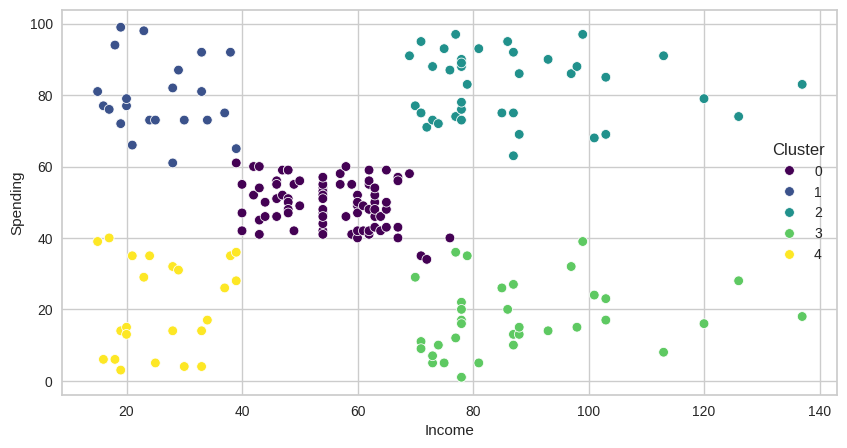

In [28]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=X1, x="Income", y="Spending", hue="Cluster", palette="viridis")
plt.show()

## 2. Aglomerative clustering

In [29]:
X_pre


,Income,Spending
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


In [30]:
from sklearn.cluster import AgglomerativeClustering

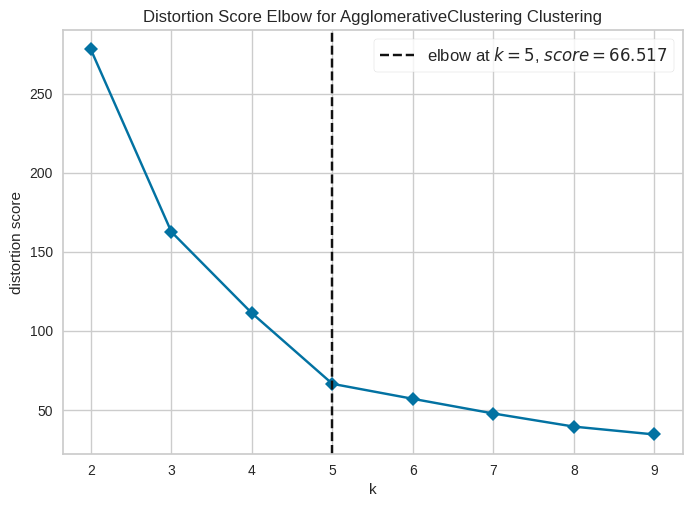

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
agc = AgglomerativeClustering()

vis2 = KElbowVisualizer(agc, k=(2, 10), timings=False)

vis2.fit(X_pre)

vis2.show()

In [32]:
best_agc = AgglomerativeClustering(n_clusters=5)

best_agc.fit(X_pre)

AgglomerativeClustering(n_clusters=5)

In [33]:
agc_labels = best_agc.labels_
agc_labels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [34]:
X1["Cluster2"] = agc_labels

In [35]:
X1

,Income,Spending,Cluster,Cluster2
0,15.0,39.0,4,4
1,15.0,81.0,1,3
2,16.0,6.0,4,4
3,16.0,77.0,1,3
4,17.0,40.0,4,4
...,...,...,...,...
195,120.0,79.0,2,1
196,126.0,28.0,3,0
197,126.0,74.0,2,1
198,137.0,18.0,3,0


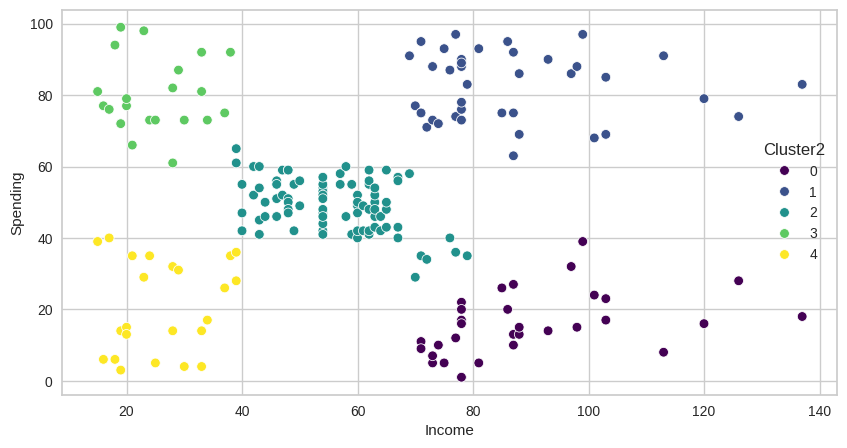

In [36]:
plt.figure(figsize=(10, 5))

sns.scatterplot(data=X1, x="Income", y="Spending", hue="Cluster2", palette="viridis")

plt.show()